## Import Packages and Data

https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction

In [1]:
import os
os.getcwd()

%cd "C:\Users\Angela\OneDrive\Desktop\ANA500"

C:\Users\Angela\OneDrive\Desktop\ANA500


In [2]:
#import packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load dataset
df = pd.read_csv('Airline_customer_satisfaction.csv')

## Prepare Data

In [4]:
#Review data type of variables
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
#Review size of data
df.shape

(129880, 22)

In [6]:
# check if there are null values
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Handle Missing Values

In [7]:
#Take a closer look at Arrival Delay in Minutes
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [8]:
#Create new variable with copy of original data
Arrival_Delay = df['Arrival Delay in Minutes']

#Add new variable to dataframe
df2 = df.assign(Arrival_Delay_Minutes = Arrival_Delay)

#Check that new variable matches orginal variable
df2['Arrival_Delay_Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay_Minutes, dtype: float64

In [9]:
#fill missing values on new variable with mean value
# filling missing value using fillna()   
df2['Arrival_Delay_Minutes'].fillna(15.091129, inplace = True)

#check the new variable to see if the missing values are updated
df2['Arrival_Delay_Minutes'].isnull().sum()

0

In [10]:
#Drop the orginal variable in second dataframe
df2.drop('Arrival Delay in Minutes', axis=1, inplace=True)

#Check that the variable was dropped
df2.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival_Delay_Minutes'],
      dtype='object')

## Data Visualizations

In [11]:
#Print the statistics of the variables
df2.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival_Delay_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Numeric Variables

In [12]:
#Create dataframe with only numeric variables
num_df = df2.select_dtypes(include = np.number)
num_df.columns = num_df.columns.str.replace(' ', '_')
num_df.columns = num_df.columns.str.replace('/', '_')
num_df.columns = num_df.columns.str.replace('-', '_')

#Check to see that the dataframe is correct
num_df.dtypes

Age                                    int64
Flight_Distance                        int64
Seat_comfort                           int64
Departure_Arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_Online_booking                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_Minutes                float64
dtype: object

In [13]:
#Correlation
corr = num_df.corr()
corr

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011229
Flight_Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109912
Seat_comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025465
Departure_Arrival_time_convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002595
Food_and_drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014857
Gate_location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003634
Inflight_wifi_service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035215
Inflight_entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033268
Online_support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036028
Ease_of_Online_booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039746


<Axes: >

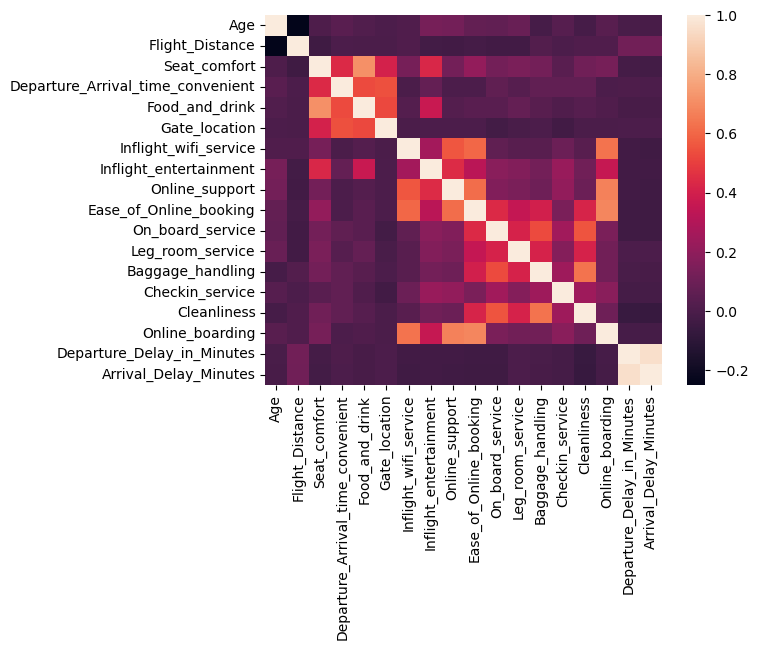

In [14]:
#Correlation Heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

C:\Users\Angela\AppData\Local\Temp\ipykernel_7400\3353264207.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, 1)


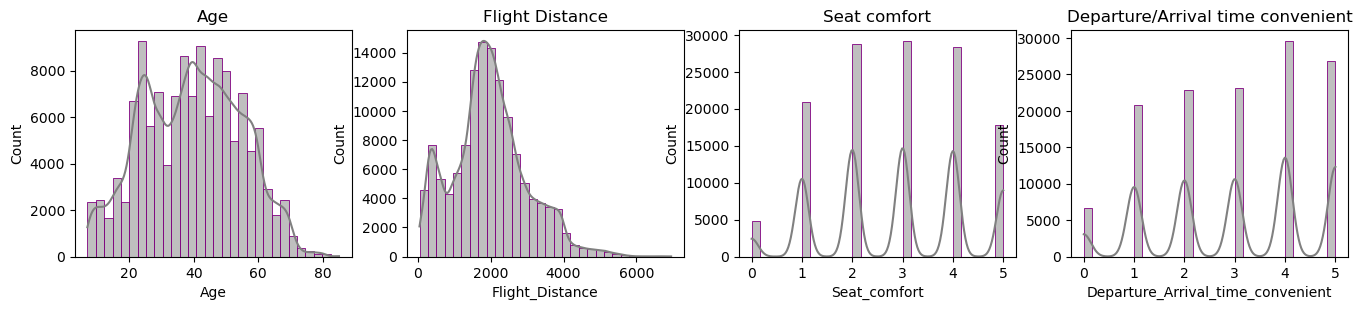

C:\Users\Angela\AppData\Local\Temp\ipykernel_7400\3353264207.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, 1)


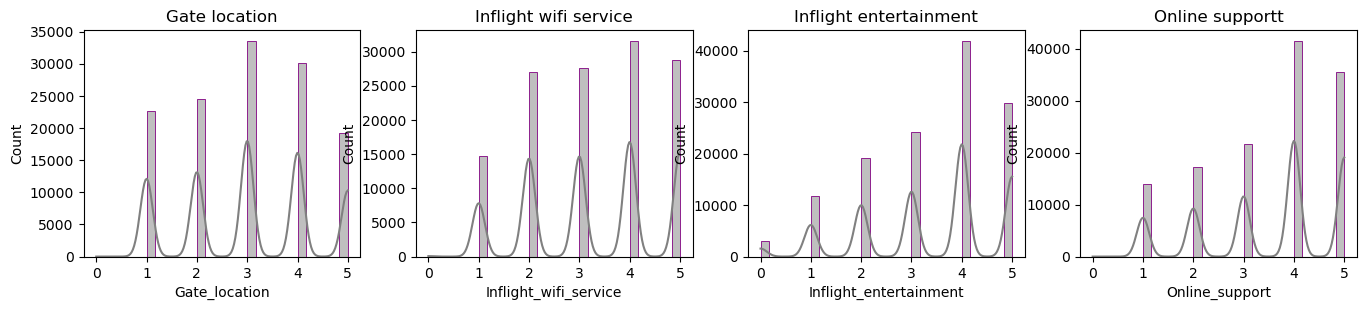

C:\Users\Angela\AppData\Local\Temp\ipykernel_7400\3353264207.py:57: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, 1)


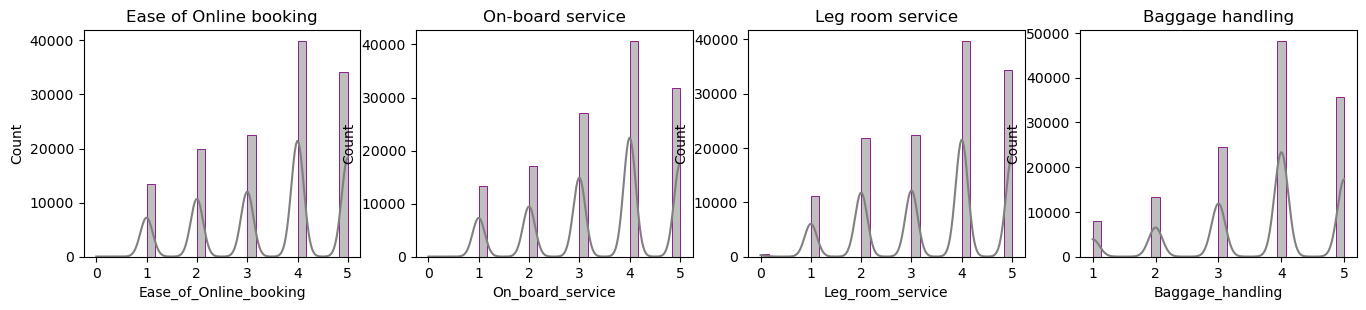

C:\Users\Angela\AppData\Local\Temp\ipykernel_7400\3353264207.py:85: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, 1)


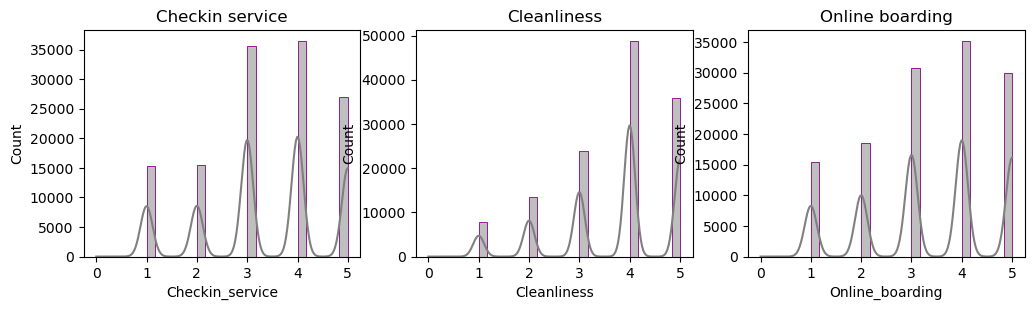

C:\Users\Angela\AppData\Local\Temp\ipykernel_7400\3353264207.py:108: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 6, 4)


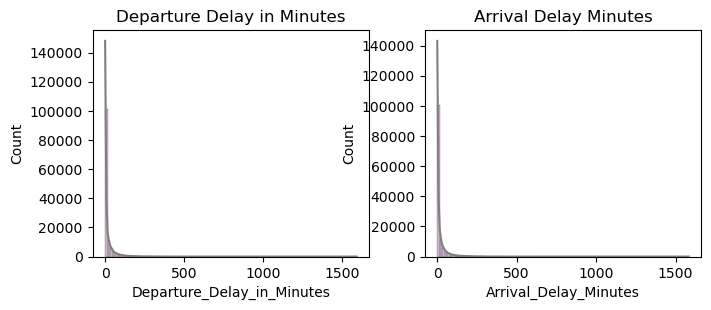

In [15]:
#Histograms
plt.subplots(figsize=(25, 10))

plt.subplot(3, 6, 1)
sns.histplot(num_df.Age, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Age')


plt.subplot(3, 6, 2)
sns.histplot(num_df.Flight_Distance, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Flight Distance')


plt.subplot(3, 6, 3)
sns.histplot(num_df.Seat_comfort, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Seat comfort')


plt.subplot(3, 6, 4)
sns.histplot(num_df.Departure_Arrival_time_convenient, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Departure/Arrival time convenient')


plt.show()


plt.subplots(figsize=(25, 10))

plt.subplot(3, 6, 1)
sns.histplot(num_df.Gate_location, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Gate location')


plt.subplot(3, 6, 2)
sns.histplot(num_df.Inflight_wifi_service, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Inflight wifi service')


plt.subplot(3, 6, 3)
sns.histplot(num_df.Inflight_entertainment, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Inflight entertainment')


plt.subplot(3, 6, 4)
sns.histplot(num_df.Online_support, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Online supportt')



plt.show()




plt.subplots(figsize=(25, 10))

plt.subplot(3, 6, 1)
sns.histplot(num_df.Ease_of_Online_booking, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Ease of Online booking')


plt.subplot(3, 6, 2)
sns.histplot(num_df.On_board_service, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('On-board service')


plt.subplot(3, 6, 3)
sns.histplot(num_df.Leg_room_service, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Leg room service')


plt.subplot(3, 6, 4)
sns.histplot(num_df.Baggage_handling, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Baggage handling')



plt.show()




plt.subplots(figsize=(25, 10))

plt.subplot(3, 6, 1)
sns.histplot(num_df.Checkin_service, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Checkin service')


plt.subplot(3, 6, 2)
sns.histplot(num_df.Cleanliness, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Cleanliness')


plt.subplot(3, 6, 3)
sns.histplot(num_df.Online_boarding, bins=30, kde=True, color='grey', edgecolor='purple')
plt.title('Online boarding')


plt.show()




plt.subplots(figsize=(25, 10))


plt.subplot(3, 6, 4)
sns.histplot(num_df.Departure_Delay_in_Minutes, bins=100, kde=True, color='grey', edgecolor='purple')
plt.title('Departure Delay in Minutes')

plt.subplot(3, 6, 5)
sns.histplot(num_df.Arrival_Delay_Minutes, bins=100, kde=True, color='grey', edgecolor='purple')
plt.title('Arrival Delay Minutes')


plt.show()

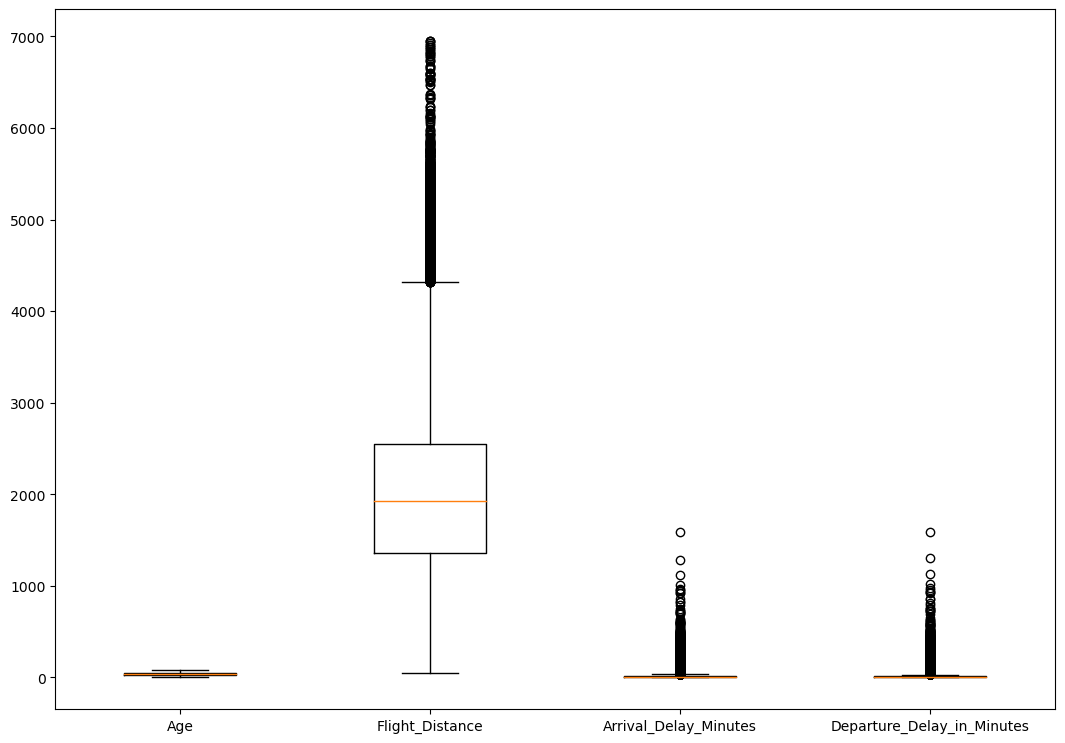

In [19]:
#Boxplots to review outliers of numeric data. (other variables in num_df appear to be categorical numeric)

data_1 = num_df['Age']
data_2 = num_df['Flight_Distance']
data_3 = num_df['Arrival_Delay_Minutes']
data_4 = num_df['Departure_Delay_in_Minutes']
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)


# y-axis labels
ax.set_xticklabels(['Age', 'Flight_Distance', 
                    'Arrival_Delay_Minutes', 'Departure_Delay_in_Minutes'])

# Adding title 
plt.title("Numeric Data")


# show plot
plt.show()

C:\Users\Angela\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


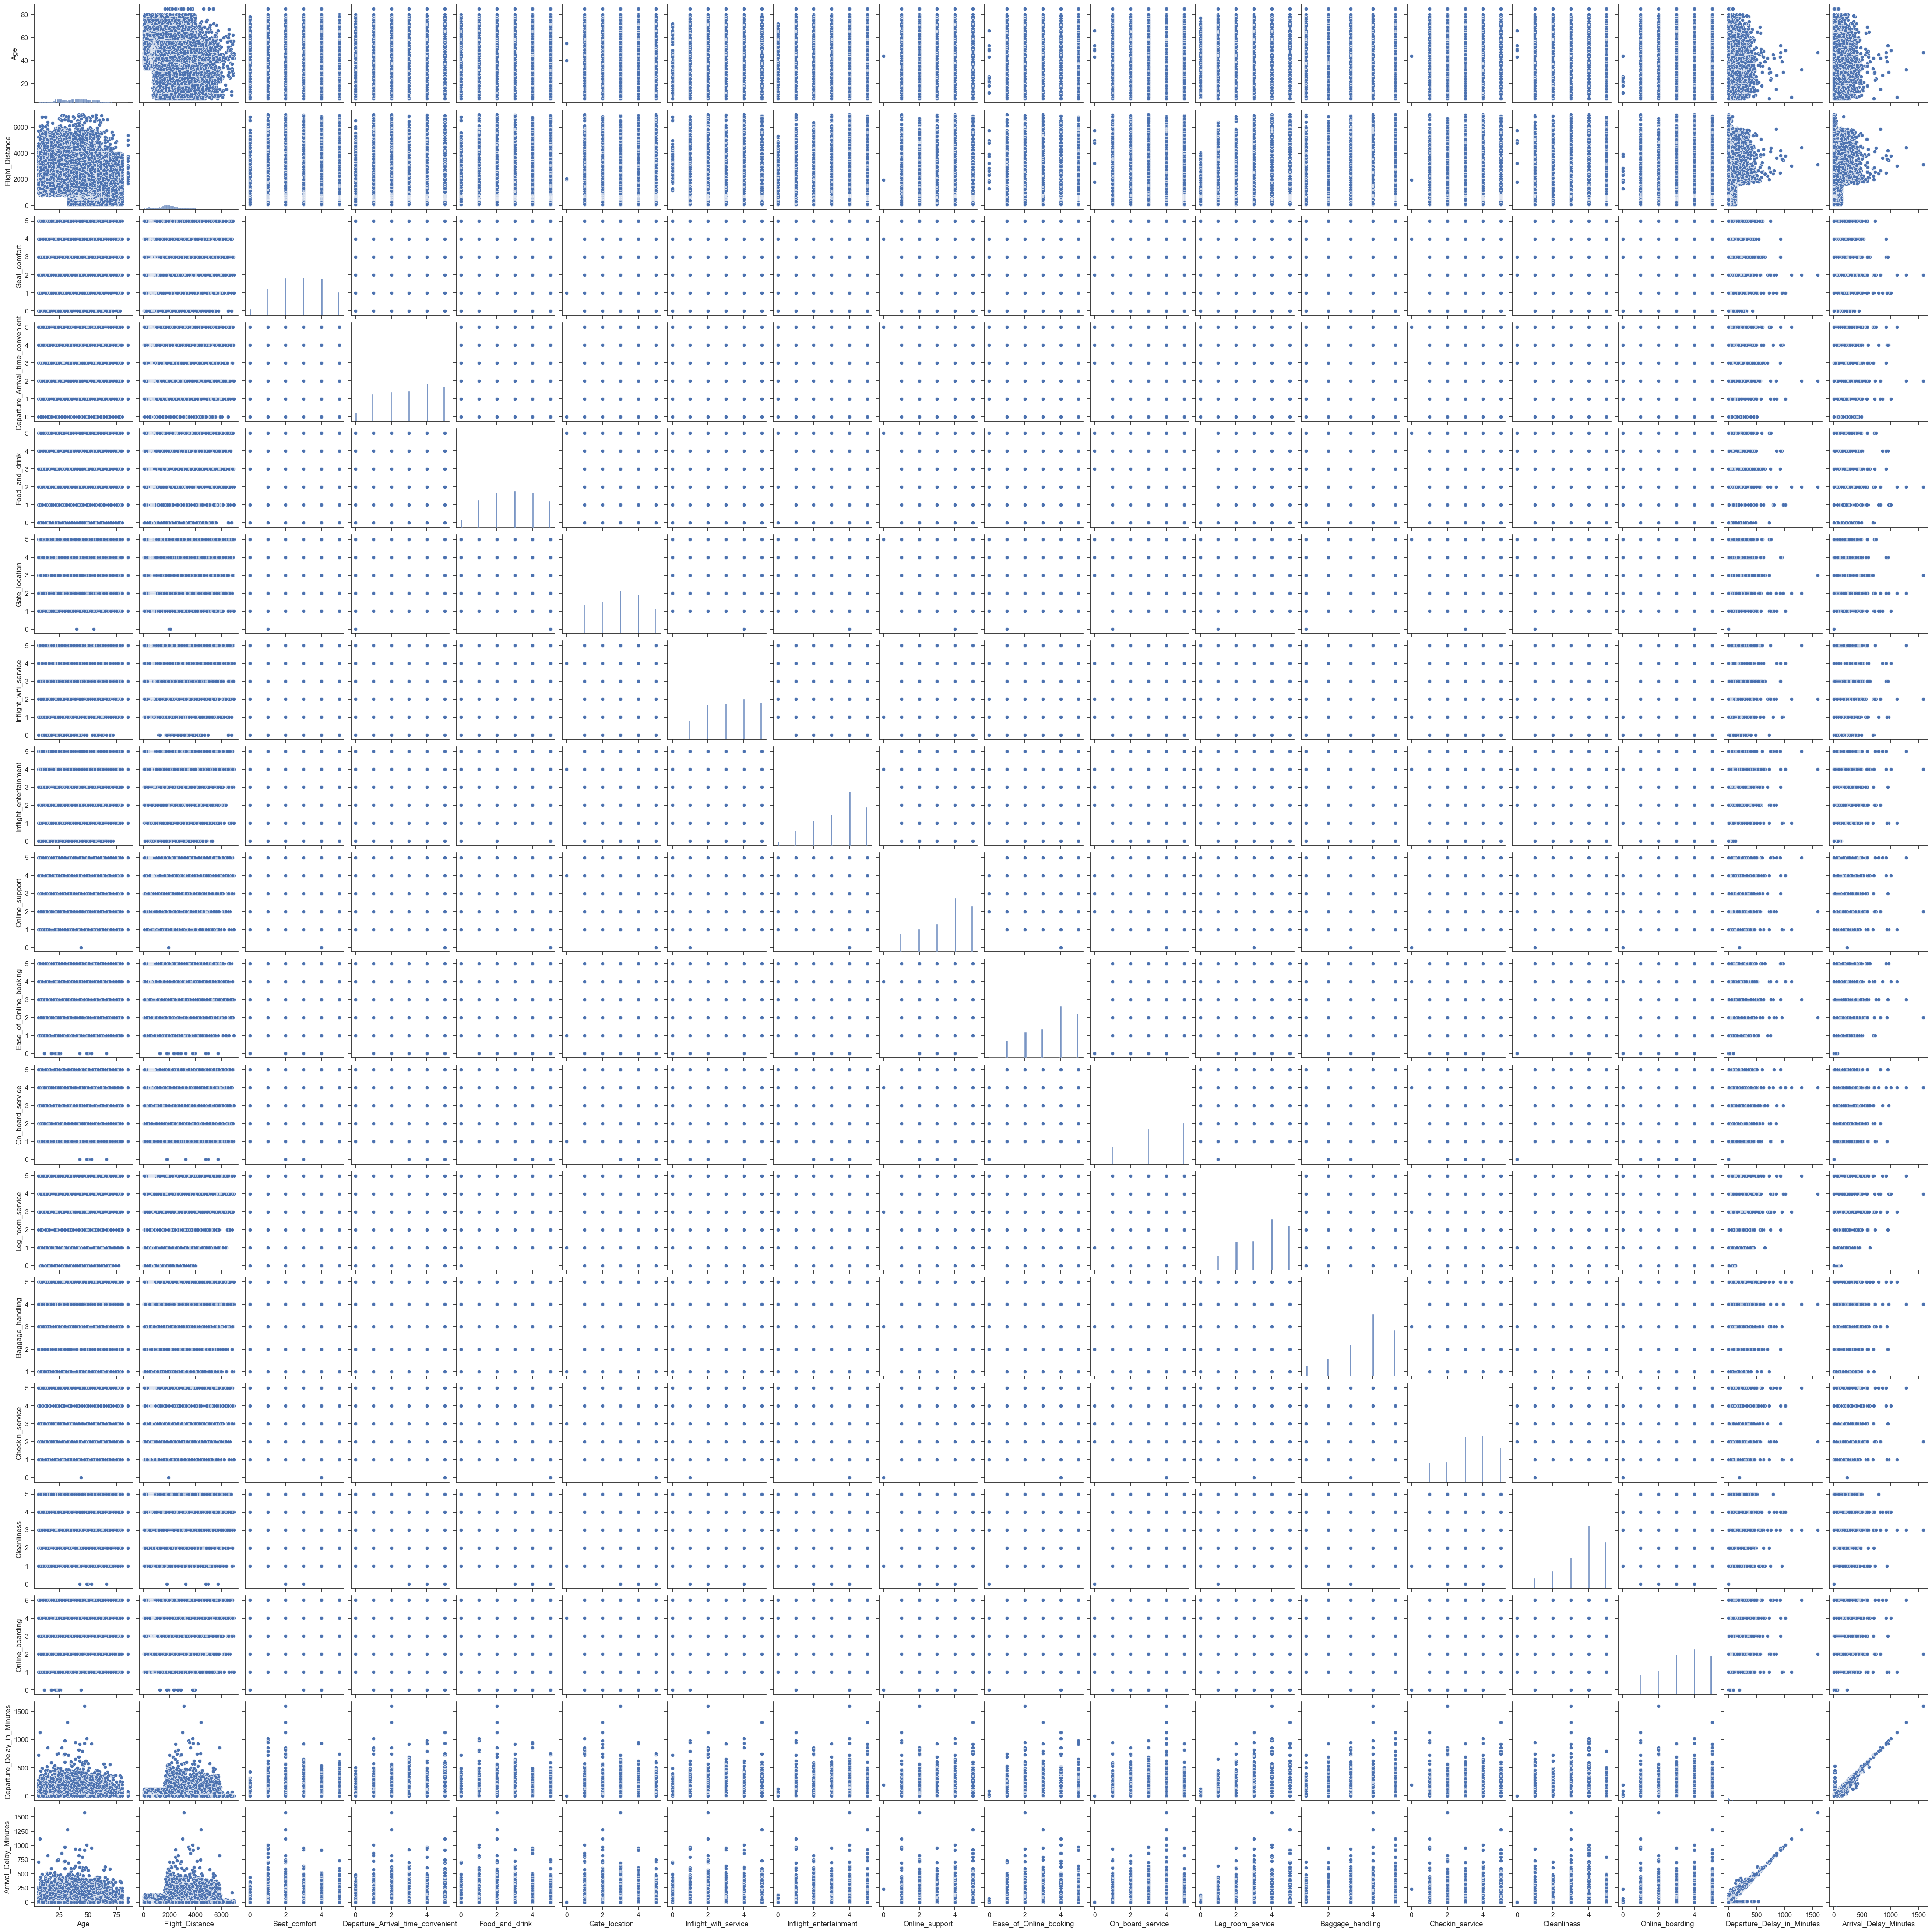

In [20]:
#Scatterplots

sns.set_theme(style="ticks")

sns.pairplot(num_df)

### Categorical Data

In [31]:
#Create dataframe with only categorical variables
cat_df = df2.select_dtypes(exclude = np.number)

cat_df.columns = cat_df.columns.str.replace(' ', '_')

#Review categories
cat_df.head()

,satisfaction,Customer_Type,Type_of_Travel,Class
0,satisfied,Loyal Customer,Personal Travel,Eco
1,satisfied,Loyal Customer,Personal Travel,Business
2,satisfied,Loyal Customer,Personal Travel,Eco
3,satisfied,Loyal Customer,Personal Travel,Eco
4,satisfied,Loyal Customer,Personal Travel,Eco


In [32]:
#Check Data types
cat_df.dtypes

satisfaction      object
Customer_Type     object
Type_of_Travel    object
Class             object
dtype: object

In [33]:
#Change Object to Category
cat_df.satisfaction = cat_df.satisfaction.astype('category')
cat_df.Customer_Type = cat_df.Customer_Type.astype('category')
cat_df.Type_of_Travel = cat_df.Type_of_Travel.astype('category')
cat_df.Class = cat_df.Class.astype('category')

#Check Data types again
cat_df.dtypes

satisfaction      category
Customer_Type     category
Type_of_Travel    category
Class             category
dtype: object

<Axes: xlabel='satisfaction', ylabel='count'>

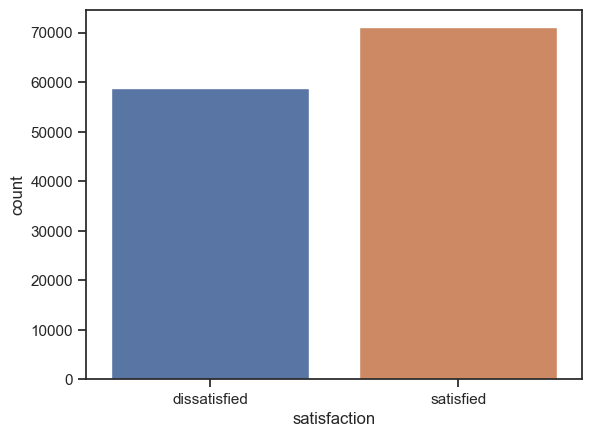

In [36]:
sns.countplot(cat_df, x="satisfaction")

<Axes: xlabel='Customer_Type', ylabel='count'>

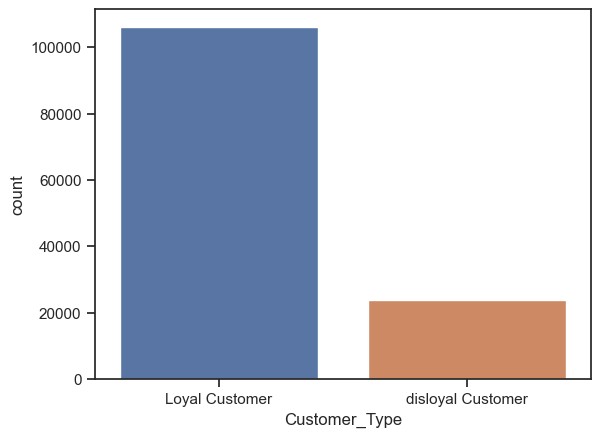

In [37]:
sns.countplot(cat_df, x="Customer_Type")

<Axes: xlabel='Type_of_Travel', ylabel='count'>

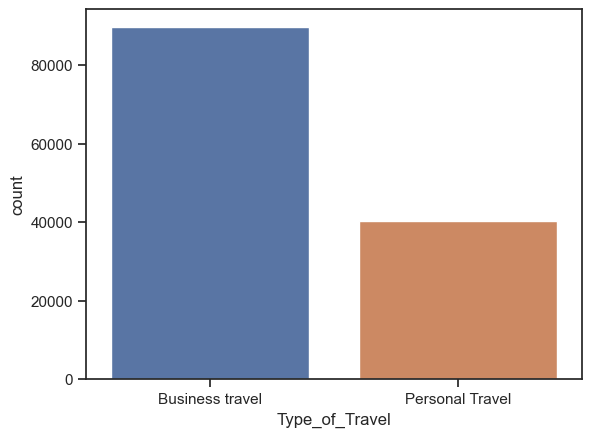

In [38]:
sns.countplot(cat_df, x="Type_of_Travel")

<Axes: xlabel='Class', ylabel='count'>

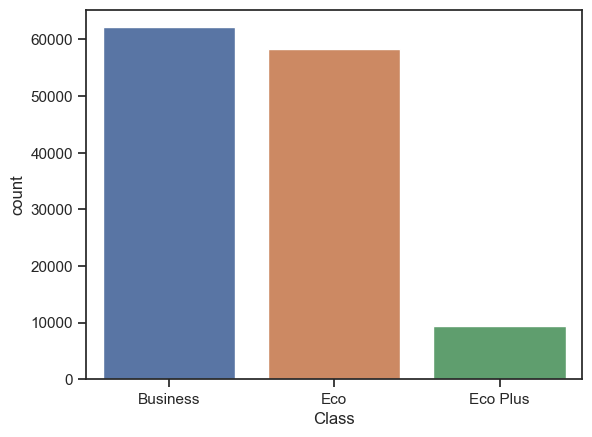

In [39]:
sns.countplot(cat_df, x="Class")